Data er upor e Mathematical Transformation chalale data Normal Distribution e convert hobe. Besh kichu ML algorithms ache jegulo Normally Distributed data te valo perform kore

SciKit Learn e 3 dhoroner transformer ache. 1. Function Transformer, 2. Power Transformer & 3. Quantile Transformer

Function Transformer - 
    1. log
    2. sq
    3. sqrt

Power Transformer - 
    1. Box-Cox
    2. Yeo-John's

### How to find if data is normal?

1. sns.distplot()
2. pd.skew()
3. QQ plot

### Log Transform

x' = log(x)

### Reciprocal Transform

x' = 1/x

### Squre Transform

x' = x^2

It is being used for left skewed data

### Square Root Transform

x' = sqrt(x)

## Code

In [9]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [10]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [16]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_9400\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [19]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_9400\1005235208.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(),inplace=True)


In [20]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [21]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [22]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\USER\AppData\Local\Temp\ipykernel_9400\2647799123.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


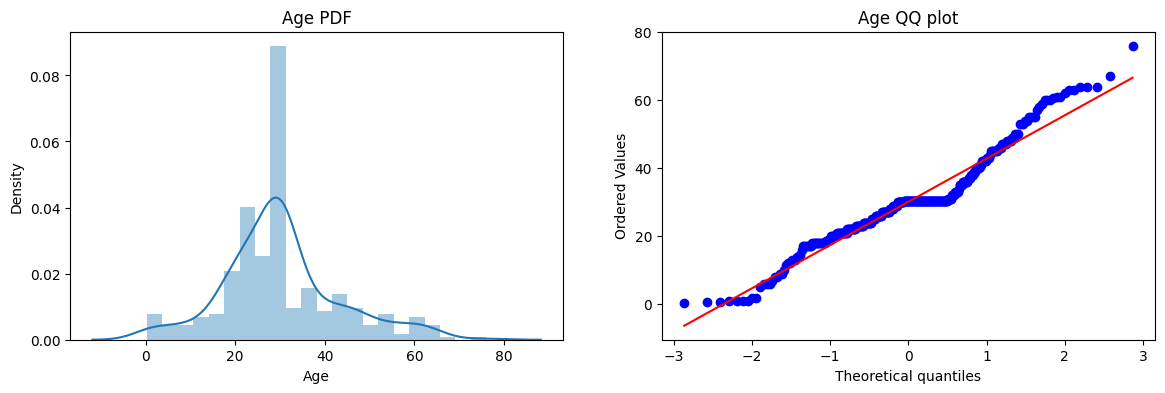

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9400\526554349.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


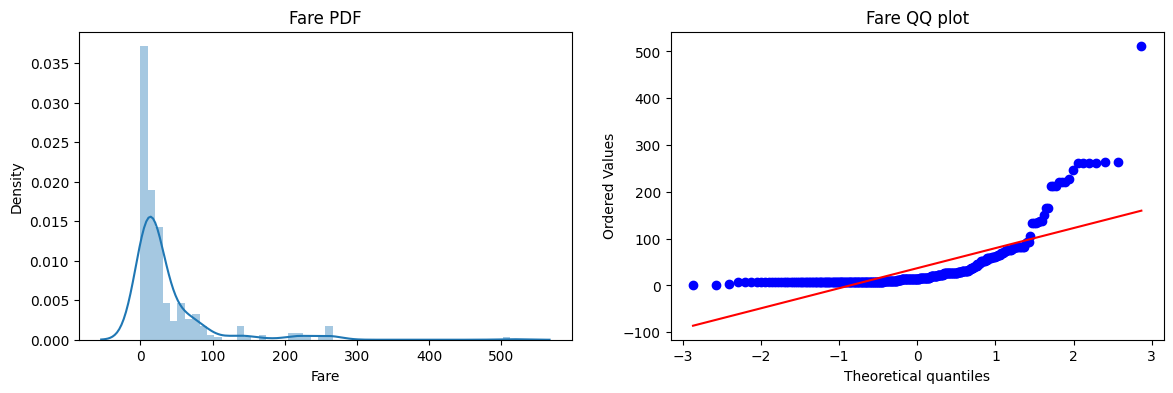

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [26]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [27]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Accuracy LR ",accuracy_score(y_test,y_pred))
print("Accuracy DT ",accuracy_score(y_test,y_pred1))

Accuracy LR  0.6071428571428571
Accuracy DT  0.5357142857142857


In [29]:
trf = FunctionTransformer(func=np.log1p)

In [30]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [32]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR ",accuracy_score(y_test,y_pred))
print("Accuracy DT ",accuracy_score(y_test,y_pred1))

Accuracy LR  0.6190476190476191
Accuracy DT  0.5595238095238095


In [33]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.6556329849012775
DT 0.5838559814169569


Text(0.5, 1.0, 'Fare after Log')

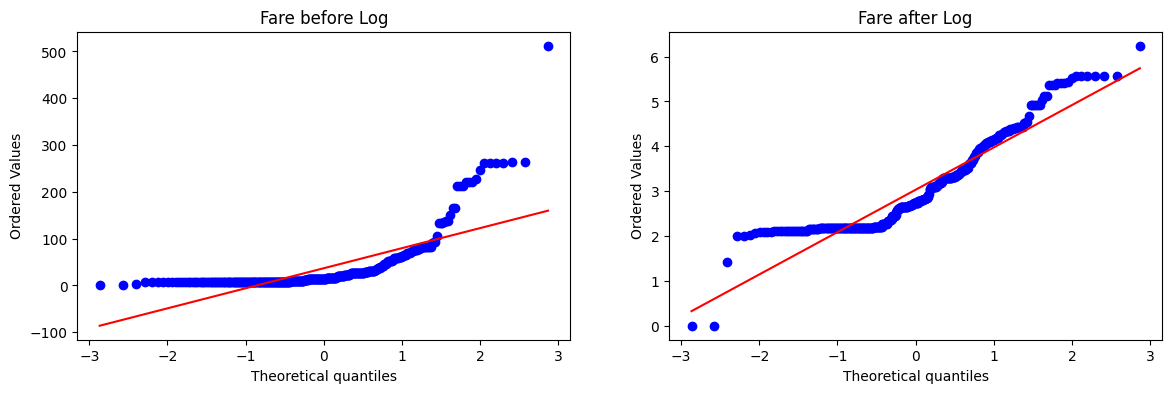

In [35]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare after Log')

In [36]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf.fit_transform(x_train)
x_test_transformed2 = trf.fit_transform(x_test)

In [37]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)

print("Accuracy LR ",accuracy_score(y_test,y_pred))
print("Accuracy DT ",accuracy_score(y_test,y_pred2))

Accuracy LR  0.6190476190476191
Accuracy DT  0.5595238095238095


In [38]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6507549361207897
DT 0.5813008130081301


In [45]:
def apply_transform(transform):
    x = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    x_trans = trf.fit_transform(x)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,x_trans,y,scoring="accuracy",cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist='norm', plot=plt)
    plt.title('Fare before Transform')

    plt.subplot(122)
    stats.probplot(x_trans[:,0], dist='norm', plot=plt)
    plt.title('Fare after Transform')

    plt.show()

Accuracy 0.6483739837398372


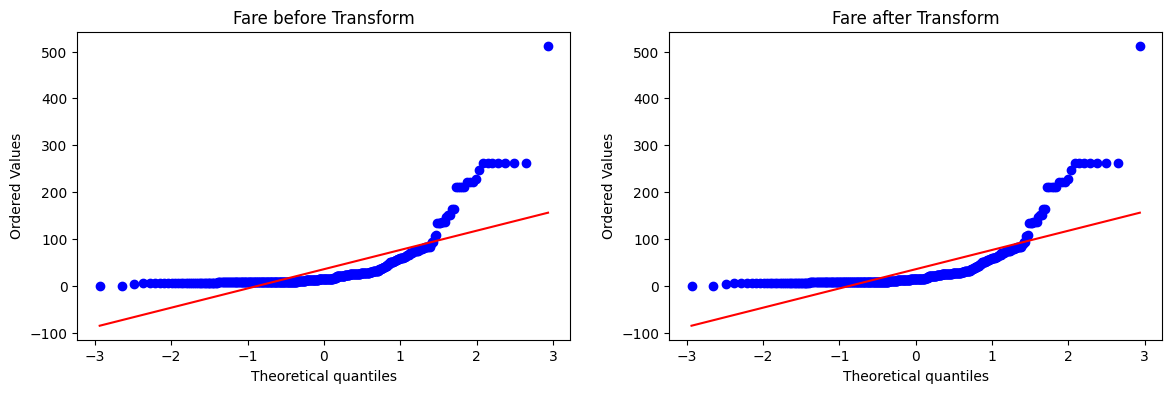

In [46]:
apply_transform(lambda x: x)

Accuracy 0.6506968641114981


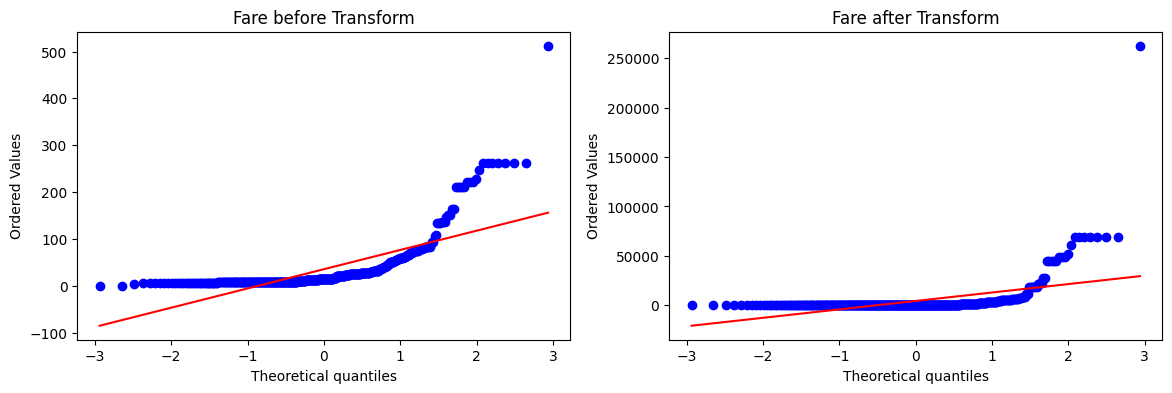

In [50]:
apply_transform(lambda x: x**2)

Accuracy 0.6363530778164923


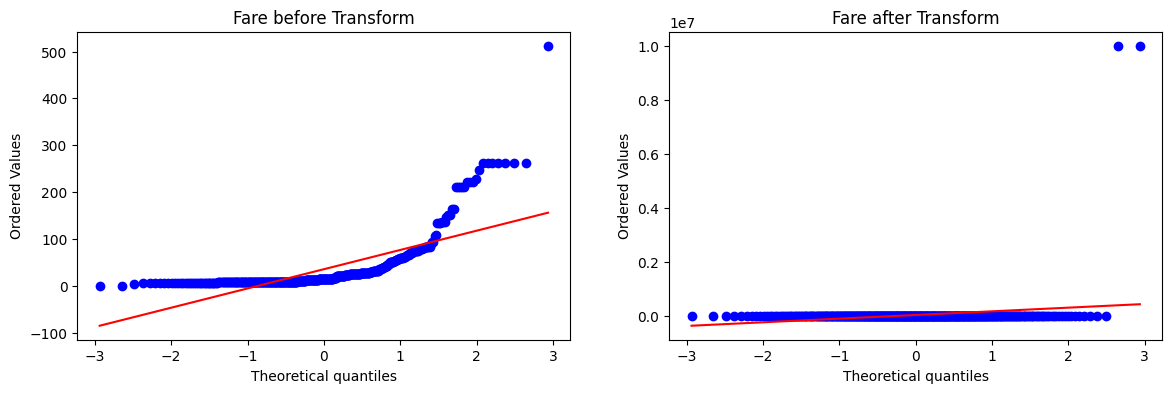

In [51]:
apply_transform(lambda x: 1/(x+0.0000001))